Importing libraries for data analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Features of the final dataset which are present in different csv files individually  

In [2]:
# "hydro_power_generation_per_person","cars_trucks_and_buses_per_1000_persons" dont have 2014 data so discarding them
features = ["co2_emissions_tonnes_per_person","yearly_co2_emissions_1000_tonnes","forest_coverage_percent","oil_production_per_person",
            "oil_consumption_per_cap","natural_gas_production_per_person","industry_percent_of_gdp",
            "income_per_person_gdppercapita_ppp_inflation_adjusted",
            "electricity_use_per_person","electricity_generation_per_person","coal_consumption_per_cap",
            ]

Reading all the feature/csv files and converting them into dataframe having same name as csv files and each containing the data for the year 2014

In [3]:
for feature in features:
    globals()[feature]  = pd.read_csv("all_csv/{}.csv".format(feature))[['geo','2014']]

In [4]:
data_frames = [co2_emissions_tonnes_per_person,yearly_co2_emissions_1000_tonnes,forest_coverage_percent,oil_production_per_person,oil_consumption_per_cap,
               natural_gas_production_per_person,industry_percent_of_gdp,income_per_person_gdppercapita_ppp_inflation_adjusted,
              electricity_use_per_person,electricity_generation_per_person,coal_consumption_per_cap]

Converting the column name "2014" by the name of feature itself of each feature dataset

In [5]:
i = 0
for data in data_frames:
    data.rename(columns={"2014":"{}".format(features[i])},inplace=True)
    i = i+1

Checking for target variable

In [6]:
co2_emissions_tonnes_per_person['co2_emissions_tonnes_per_person'].isnull().sum()

0

Merging all the feature dataset on the basis of "geo" to create the final dataset by performing left join 

In [7]:
import functools

In [8]:
df_merged = functools.reduce(lambda  left,right: pd.merge(left,right,on=["geo"],
                                            how='left'),data_frames)

In [9]:
df_merged.head()

,geo,co2_emissions_tonnes_per_person,yearly_co2_emissions_1000_tonnes,forest_coverage_percent,oil_production_per_person,oil_consumption_per_cap,natural_gas_production_per_person,industry_percent_of_gdp,income_per_person_gdppercapita_ppp_inflation_adjusted,electricity_use_per_person,electricity_generation_per_person,coal_consumption_per_cap
0,Afghanistan,0.299,9810.0,2.07,NaN,NaN,NaN,21.10,1780.0,NaN,NaN,NaN
1,Albania,1.960,5720.0,28.20,NaN,NaN,NaN,21.50,10700.0,2310.0,NaN,NaN
2,Algeria,3.720,145000.0,0.82,1.76,0.452,1.92,42.30,13500.0,1360.0,1640.0,0.00458
3,Andorra,5.830,462.0,34.00,NaN,NaN,NaN,9.91,44900.0,NaN,NaN,NaN
4,Angola,1.290,34800.0,46.50,3.08,NaN,NaN,NaN,6260.0,312.0,NaN,NaN


In [10]:
df_merged.set_index("geo",inplace=True)

In [11]:
df_merged

,co2_emissions_tonnes_per_person,yearly_co2_emissions_1000_tonnes,forest_coverage_percent,oil_production_per_person,oil_consumption_per_cap,natural_gas_production_per_person,industry_percent_of_gdp,income_per_person_gdppercapita_ppp_inflation_adjusted,electricity_use_per_person,electricity_generation_per_person,coal_consumption_per_cap
geo,,,,,,,,,,,
Afghanistan,0.299,9810.0,2.07,NaN,NaN,NaN,21.10,1780.0,NaN,NaN,NaN
Albania,1.960,5720.0,28.20,NaN,NaN,NaN,21.50,10700.0,2310.0,NaN,NaN
Algeria,3.720,145000.0,0.82,1.760,0.452,1.9200,42.30,13500.0,1360.0,1640.0,0.00458
Andorra,5.830,462.0,34.00,NaN,NaN,NaN,9.91,44900.0,NaN,NaN,NaN
Angola,1.290,34800.0,46.50,3.080,NaN,NaN,NaN,6260.0,312.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,6.030,185000.0,53.10,4.510,1.090,0.8390,37.20,16700.0,2660.0,3590.0,0.00641
Vietnam,1.800,167000.0,47.20,0.195,0.195,0.0993,33.20,5370.0,1410.0,1540.0,0.20500
Yemen,0.865,22700.0,1.04,0.256,NaN,0.3200,44.00,3770.0,216.0,NaN,NaN


In [12]:
df_merged.shape

(192, 11)

In [13]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, Afghanistan to Zimbabwe
Data columns (total 11 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   co2_emissions_tonnes_per_person                        192 non-null    float64
 1   yearly_co2_emissions_1000_tonnes                       192 non-null    float64
 2   forest_coverage_percent                                190 non-null    float64
 3   oil_production_per_person                              49 non-null     float64
 4   oil_consumption_per_cap                                65 non-null     float64
 5   natural_gas_production_per_person                      49 non-null     float64
 6   industry_percent_of_gdp                                183 non-null    float64
 7   income_per_person_gdppercapita_ppp_inflation_adjusted  191 non-null    float64
 8   electricity_use_per_person              

In [14]:
def outlier_treat(x):
    q1 = x.quantile(.25)
    q3 = x.quantile(.75)
    iqr = q3-q1
    lower = q1-q1*1.5
    upper = q3+q3*1.5
    return (lower,upper)

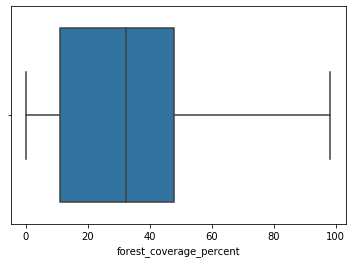

In [15]:
sns.boxplot(x=df_merged['forest_coverage_percent'])

In [16]:
df_merged['forest_coverage_percent'] = df_merged['forest_coverage_percent'].fillna(df_merged['forest_coverage_percent'].median())

In [17]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, Afghanistan to Zimbabwe
Data columns (total 11 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   co2_emissions_tonnes_per_person                        192 non-null    float64
 1   yearly_co2_emissions_1000_tonnes                       192 non-null    float64
 2   forest_coverage_percent                                192 non-null    float64
 3   oil_production_per_person                              49 non-null     float64
 4   oil_consumption_per_cap                                65 non-null     float64
 5   natural_gas_production_per_person                      49 non-null     float64
 6   industry_percent_of_gdp                                183 non-null    float64
 7   income_per_person_gdppercapita_ppp_inflation_adjusted  191 non-null    float64
 8   electricity_use_per_person              

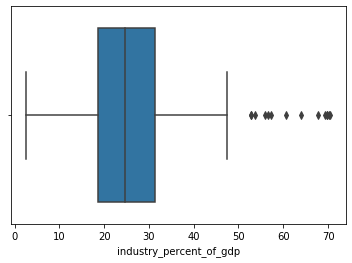

In [18]:
sns.boxplot(x=df_merged['industry_percent_of_gdp'])

In [19]:
df_merged['industry_percent_of_gdp'] = df_merged['industry_percent_of_gdp'].fillna(df_merged['industry_percent_of_gdp'].median())

In [20]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, Afghanistan to Zimbabwe
Data columns (total 11 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   co2_emissions_tonnes_per_person                        192 non-null    float64
 1   yearly_co2_emissions_1000_tonnes                       192 non-null    float64
 2   forest_coverage_percent                                192 non-null    float64
 3   oil_production_per_person                              49 non-null     float64
 4   oil_consumption_per_cap                                65 non-null     float64
 5   natural_gas_production_per_person                      49 non-null     float64
 6   industry_percent_of_gdp                                192 non-null    float64
 7   income_per_person_gdppercapita_ppp_inflation_adjusted  191 non-null    float64
 8   electricity_use_per_person              

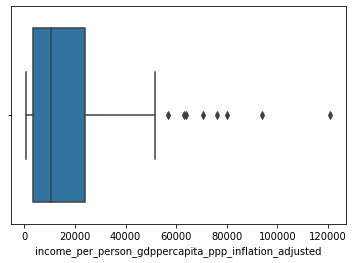

In [21]:
sns.boxplot(x=df_merged['income_per_person_gdppercapita_ppp_inflation_adjusted'])

In [22]:
df_merged['income_per_person_gdppercapita_ppp_inflation_adjusted'] = df_merged['income_per_person_gdppercapita_ppp_inflation_adjusted'].fillna(
                                                    df_merged['income_per_person_gdppercapita_ppp_inflation_adjusted'].median())
                                                                     

In [23]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, Afghanistan to Zimbabwe
Data columns (total 11 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   co2_emissions_tonnes_per_person                        192 non-null    float64
 1   yearly_co2_emissions_1000_tonnes                       192 non-null    float64
 2   forest_coverage_percent                                192 non-null    float64
 3   oil_production_per_person                              49 non-null     float64
 4   oil_consumption_per_cap                                65 non-null     float64
 5   natural_gas_production_per_person                      49 non-null     float64
 6   industry_percent_of_gdp                                192 non-null    float64
 7   income_per_person_gdppercapita_ppp_inflation_adjusted  192 non-null    float64
 8   electricity_use_per_person              

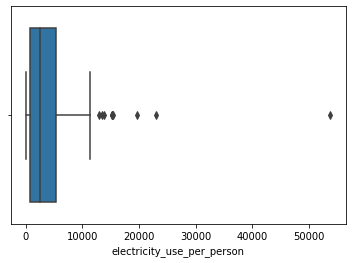

In [24]:
sns.boxplot(x=df_merged['electricity_use_per_person'])

In [25]:
df_merged['electricity_use_per_person'] = df_merged['electricity_use_per_person'].fillna(
                                           df_merged['electricity_use_per_person'].median())

In [26]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, Afghanistan to Zimbabwe
Data columns (total 11 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   co2_emissions_tonnes_per_person                        192 non-null    float64
 1   yearly_co2_emissions_1000_tonnes                       192 non-null    float64
 2   forest_coverage_percent                                192 non-null    float64
 3   oil_production_per_person                              49 non-null     float64
 4   oil_consumption_per_cap                                65 non-null     float64
 5   natural_gas_production_per_person                      49 non-null     float64
 6   industry_percent_of_gdp                                192 non-null    float64
 7   income_per_person_gdppercapita_ppp_inflation_adjusted  192 non-null    float64
 8   electricity_use_per_person              

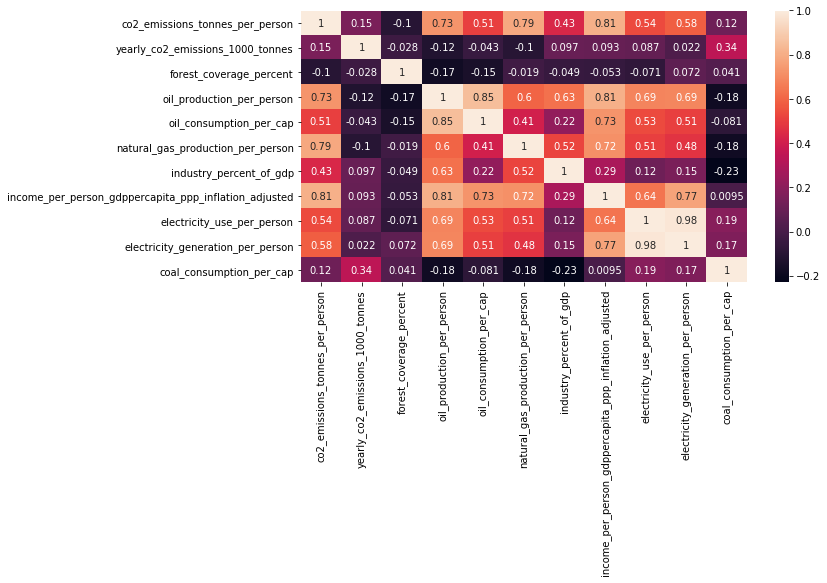

In [27]:
plt.figure(figsize=(10,5))
sns.heatmap(df_merged.corr(),annot=True)

Correlation is too high among some variables ,also having too much missing values so discarding those variables

In [28]:
df_merged_one = df_merged.drop(['oil_production_per_person','oil_consumption_per_cap','natural_gas_production_per_person',
                               'electricity_generation_per_person','coal_consumption_per_cap'],axis=1)

In [29]:
df_merged_one

,co2_emissions_tonnes_per_person,yearly_co2_emissions_1000_tonnes,forest_coverage_percent,industry_percent_of_gdp,income_per_person_gdppercapita_ppp_inflation_adjusted,electricity_use_per_person
geo,,,,,,
Afghanistan,0.299,9810.0,2.07,21.10,1780.0,2580.0
Albania,1.960,5720.0,28.20,21.50,10700.0,2310.0
Algeria,3.720,145000.0,0.82,42.30,13500.0,1360.0
Andorra,5.830,462.0,34.00,9.91,44900.0,2580.0
Angola,1.290,34800.0,46.50,24.70,6260.0,312.0
...,...,...,...,...,...,...
Venezuela,6.030,185000.0,53.10,37.20,16700.0,2660.0
Vietnam,1.800,167000.0,47.20,33.20,5370.0,1410.0
Yemen,0.865,22700.0,1.04,44.00,3770.0,216.0


Seperating features and target variables into x and y 

In [30]:
y = df_merged_one['co2_emissions_tonnes_per_person']
x = df_merged_one.drop(['co2_emissions_tonnes_per_person'],axis=1)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [32]:
scale = MinMaxScaler()

Splitting into training and testing dataset

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)

In [34]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((134, 5), (58, 5), (134,), (58,))

Scaling of training and testing feature dataset i.e x_train,x_test

In [35]:
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.fit_transform(x_test)

Linear Regression model building

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lr_model = LinearRegression()

In [38]:
lr_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
from sklearn.metrics import mean_squared_error

In [40]:
pred = lr_model.predict(x_test)

In [41]:
print(mean_squared_error(y_test,pred))

9.987489122433908


In [42]:
lr_model.score(x_test,y_test)

0.5710268836917567

Importing generalized regression libraries

In [43]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeCV,LassoCV

Values for hyperparameter tunning

In [44]:
alphas = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
          4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]

Ridge cross validation to choose best value for hyperparameter i.e. alpha/lambda

In [45]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True,store_cv_values=True)
ridgecv.fit(x_train, y_train)
ridgecv.alpha_

0.4

Building ridge regression model

In [46]:
from yellowbrick.regressor import AlphaSelection

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


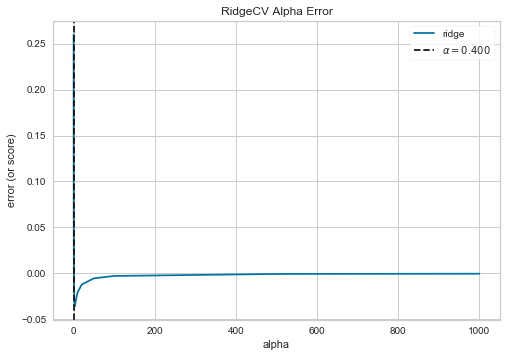

In [47]:
visualizer_ridge = AlphaSelection(ridgecv)
visualizer_ridge.fit(x_train, y_train)
visualizer_ridge.show()

In [48]:
ridgeReg = Ridge(alpha=0.4, normalize=True)
ridgeReg.fit(x_train,y_train)
ridge_pred = ridgeReg.predict(x_test)

In [49]:
print(mean_squared_error(y_test,ridge_pred))

8.840210183154134


In [50]:
ridgeReg.score(x_test,y_test)

0.6203037155185056

Lasso cross validation to choose best value for hyperparameter i.e. alpha/lambda

In [51]:
lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 100, normalize = True)
lassocv.fit(x_train, y_train)
lassocv.alpha_

0.1

Building Lasso regression model

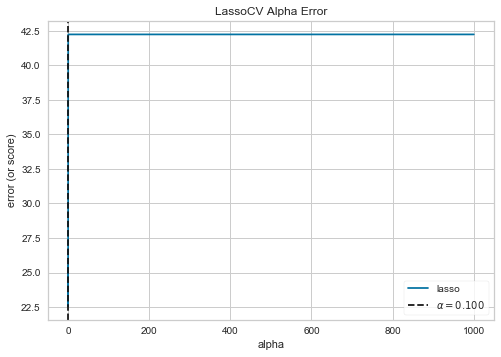

In [52]:
visualizer_lasso = AlphaSelection(lassocv)
visualizer_lasso.fit(x_train, y_train)
visualizer_lasso.show()

In [53]:
lassoReg = Lasso(alpha=0.1, normalize=True)
lassoReg.fit(x_train,y_train)
lasso_pred = lassoReg.predict(x_test)

In [54]:
print(mean_squared_error(y_test,lasso_pred))

7.80968406633497


In [55]:
lassoReg.score(x_test,y_test)

0.6645658913616789